#耗材记录（减少支出）
Column
设备名称：减少多余名称
重新建立总价

In [123]:
from matplotlib.font_manager import FontManager

# List available fonts
[font.name for font in FontManager().ttflist]

['STIXSizeTwoSym',
 'cmmi10',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Serif',
 'cmss10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmb10',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Sans',
 'cmsy10',
 'cmex10',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'cmr10',
 'Noto Sans Psalter Pahlavi',
 'Courier New',
 'Times New Roman',
 'Noto Serif Balinese',
 'American Typewriter',
 'Kannada Sangam MN',
 'Futura',
 'STIXVariants',
 'Noto Sans Syloti Nagri',
 'Lucida Grande',
 'Opus Text Std',
 'Avenir Next',
 'Bangla Sangam MN',
 'Apple Symbols',
 '.Keyboard',
 'Bodoni Ornaments',
 'Al Nile',
 'Ayuthaya',


In [124]:
plt.rcParams['font.family'] = 'Songti SC'

In [130]:
#import libraries

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.style.use('bmh')

#存档改成utf，把档案类型， 让存档人重新传

import os
os.environ["PYTHONIOENCODING"] = "gb2312"  #ran but the cell output is still the same

In [132]:
#import data

In [133]:
df = pd.read_excel('replaced_items sorted.xlsx')

In [134]:
#describe the data

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   日期          131 non-null    object 
 2   对应的报修编号     131 non-null    float64
 3   耗材名称        131 non-null    object 
 4   设备名称        131 non-null    object 
 5   所属公司        131 non-null    object 
 6   所属片区        97 non-null     object 
 7   所属项目        131 non-null    object 
 8   更换原因        131 non-null    object 
 9   耗材数量        131 non-null    int64  
 10  单价          131 non-null    float64
 11  总价          131 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 12.4+ KB


In [136]:
#clean data

In [137]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Unnamed: 0, 



In [138]:
#Create columns to count sum of quantity and sum of price 

In [139]:
#create a new dataframe
product_df = df[['日期','对应的报修编号','耗材数量','单价','耗材名称']].copy()

In [140]:
product_df.rename(columns={'日期': 'Date', '对应的报修编号':'Code Name', '耗材数量':'Quantity','单价':'Unit Price', '耗材名称':'Unit Name' }, inplace=True)

In [141]:
# Group by 'Unit Name' column and perform aggregation to create the sum of quantity
product = (product_df.groupby(product_df['Unit Name'].ne(product_df['Unit Name'].shift()).cumsum(), as_index=False)
           .agg({'Code Name': 'first', 'Unit Name': 'first', 'Quantity': 'sum', 'Unit Price': 'first'})
          )

In [142]:
#create a sum price column
product['sum_price']= product['Unit Price']*product['Quantity']

In [143]:
product.head()

,Code Name,Unit Name,Quantity,Unit Price,sum_price
0,2.023110e+21,R型弹簧插销 D2x40,4,1.18,4.72
1,2.023110e+21,V型带 3V-450,1,66.18,66.18
2,2.023112e+21,前车轮,7,638.18,4467.26
3,2.023102e+21,前轮隔套 D32xD25x37.3MM,3,18.91,56.73
4,2.023101e+21,十字开关 D22,1,159.55,159.55


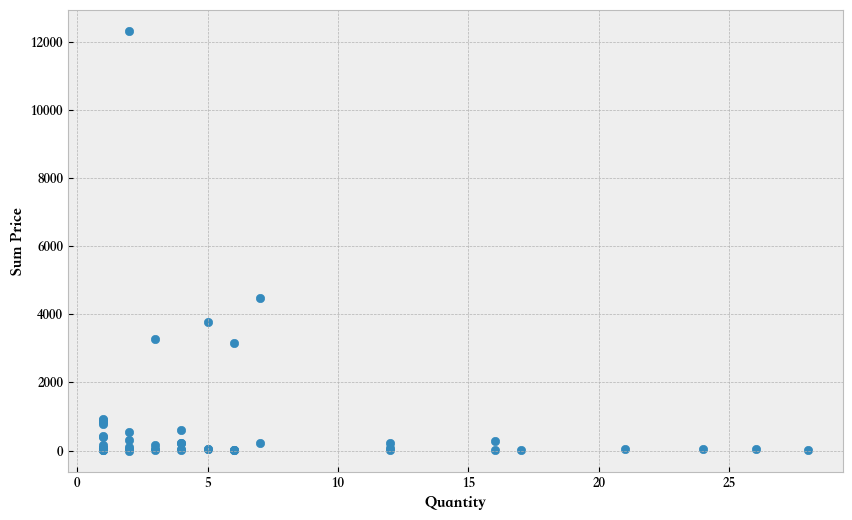

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(product['Quantity'], product['sum_price'])
plt.xlabel('Quantity')
plt.ylabel('Sum Price')
plt.show()

Comment:

Which component costs the most sum of money?

In [145]:
product_sorted = product.sort_values(by='sum_price', ascending=False)

In [146]:
top_10 = product_sorted[['Unit Name', 'sum_price']].head(20)
top_10

,Unit Name,sum_price
46,驱动电机-24V-800W,12324.00
2,前车轮,4467.26
25,操控面板-3.5寸-DALA,3781.80
28,污水箱-130L-绿色,3271.29
12,吸水电机组件-24V-500W-T130,3155.46
16,左刷盘电机组件1,932.54
30,物联网模块,911.82
9,吸尘电机-24V-400W,828.93
8,后边刷推杆电机组件,773.97
44,隔音棉 T130,602.72


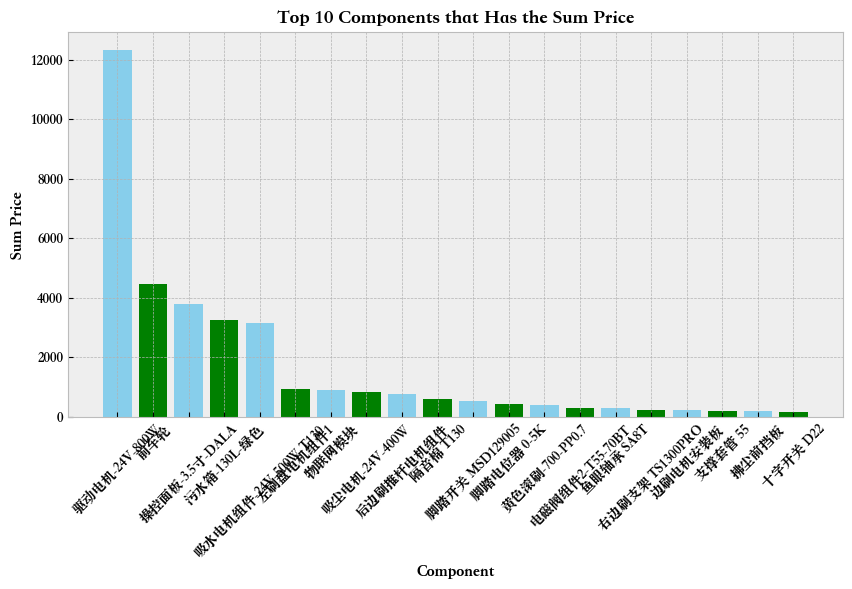

In [147]:
# Plotting the bar graph
plt.figure(figsize=(10, 5))
plt.bar(top_10['Unit Name'], top_10['sum_price'], color=('skyblue','green'))
plt.xlabel('Component')
plt.ylabel('Sum Price')
plt.title('Top 10 Components that Has the Sum Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Comment: from seeing the distributions of top 20 components that have the most sum cost, we can see that the top 5 components have the most sum price that are much more than the rest of replaced components.

List:
驱动电机-24V-800W	         $12324.00
前车轮	                      $4467.26
操控面板-3.5寸-DALA           $3781.80
污水箱-130L-绿色	             $3271.29
吸水电机组件-24V-500W-T130    $3155.46

Which component is more likely to be broken?

In [148]:
product_sorted = product.sort_values(by='Quantity', ascending=False)

In [149]:
top_10 = product_sorted[['Unit Name', 'Quantity']].head(40)

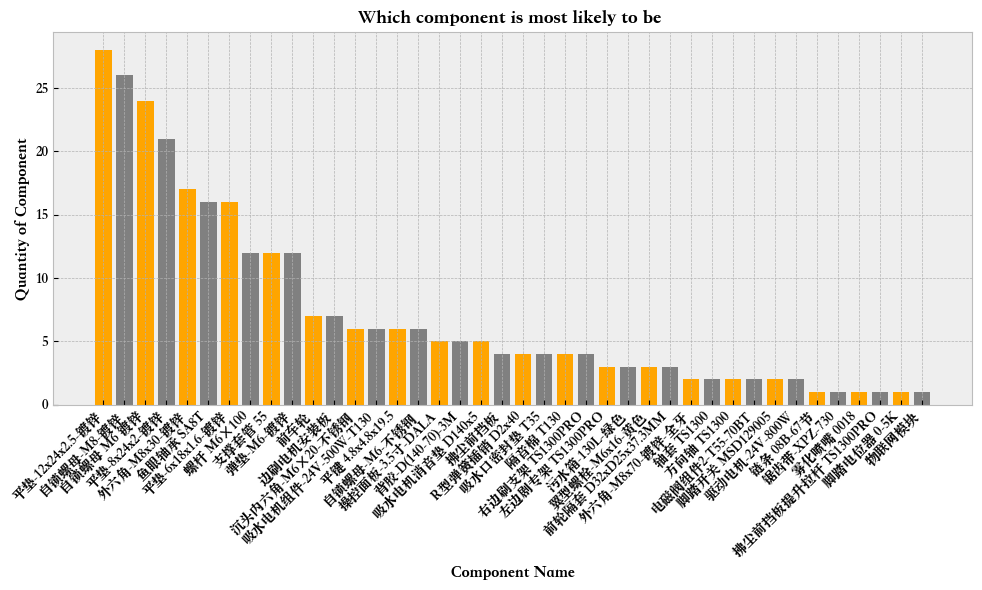

In [150]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10['Unit Name'], top_10['Quantity'], color=('orange','grey'))
plt.xlabel('Component Name')
plt.ylabel('Quantity of Component')
plt.title('Which component is most likely to be ')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Comment: we can see that there is a distinct difference between the components that have been replaced more than 10 times where the unit might be more likely in break again in the future. 

In [151]:
print(product.loc[product['Quantity'] >= 10, ['Unit Name', 'Quantity']])

          Unit Name  Quantity
14     外六角-M8x30-镀锌        17
18  平垫-12x24x2.5-镀锌        28
19   平垫-6x18x1.6-镀锌        16
20     平垫-8x24x2-镀锌        21
22         弹垫-M6-镀锌        12
26          支撑套管 55        12
36       自锁螺母 M6 镀锌        24
38       自锁螺母-M8-镀锌        26
39        螺杆 M6×100        12
47        鱼眼轴承 SA8T        16


Does seasonality and the date have to do with broken components?

In [152]:
# Assuming df is your DataFrame and '日期' is the column containing datetime values
df['日期'] = pd.to_datetime(df['日期'])  # Convert to datetime if not already

# Extract date part
df['日期'] = df['日期'].dt.date

In [153]:
df['日期']

0      2023-11-07
1      2023-10-26
2      2023-11-07
3      2023-11-29
4      2023-11-22
          ...    
126    2023-10-18
127    2023-11-13
128    2023-10-26
129    2023-10-19
130    2023-09-22
Name: 日期, Length: 131, dtype: object

In [154]:
# Group by 'Code Name' column and perform aggregation
date = (df.groupby(df['日期'].ne(df['日期'].shift()).cumsum(), as_index=False)
           .agg({'日期': 'first', '耗材数量': 'sum'})
       )

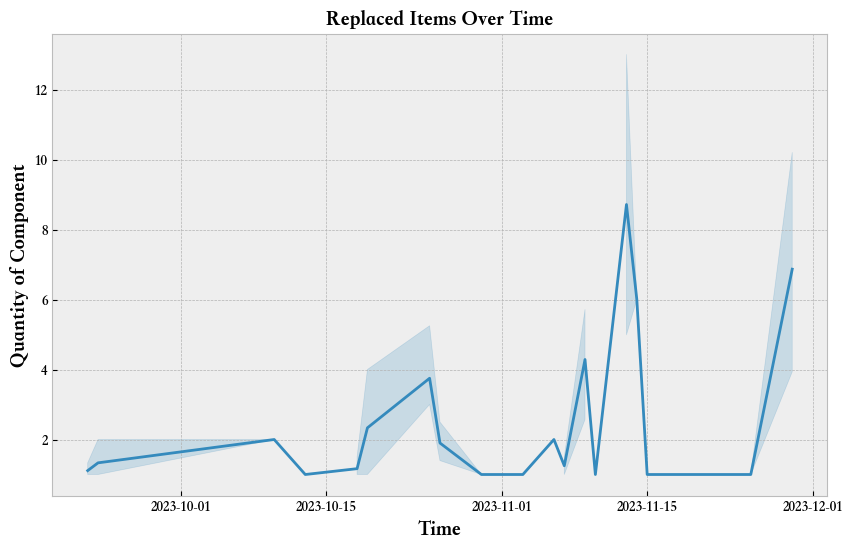

In [155]:
plt.figure(figsize=(10,6))
sns.lineplot(data=date,x="日期",y="耗材数量") #,hue="type"
plt.title("Replaced Items Over Time",fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Quantity of Component',fontsize=15)
plt.show()

Comment: It seems like the number fluctuates within the two monthes from October to December where there is a short spike around November 15th. It could be because of the quick temerature drop around first frost around the region. It's worth to investigave further once we obtained more data points over the month. 

In [ ]:
Conclusion